In [2]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [10]:
#importing the dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv('pima_indian_diabetes.csv', names = names)

In [12]:
dataset.head()
print(dataset.shape)

(768, 9)


In [14]:
#separating independent variables(X) and dependent variables(y)
X = dataset.iloc[:,:8]
y = dataset.iloc[:,8]

In [15]:
#prepare models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))

In [16]:
#Evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=57)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)    
    print("Accuracy score for {} model is {} with standard deviation {}.".format(name, cv_results.mean(), cv_results.std()))

Accuracy score for DT model is 0.6938995215311005 with standard deviation 0.06710629009408993.
Accuracy score for NB model is 0.7551777170198223 with standard deviation 0.04276593954064409.
Accuracy score for KNN model is 0.7265550239234451 with standard deviation 0.06182131406705549.
Accuracy score for LR model is 0.7695146958304853 with standard deviation 0.04841051924567195.
Accuracy score for LDA model is 0.773462064251538 with standard deviation 0.05159180390446138.
Accuracy score for SVC model is 0.6510252904989747 with standard deviation 0.07214083485055327.


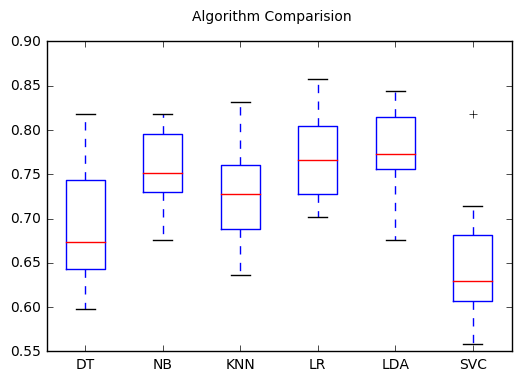

In [17]:
#Algorith comparision using Boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## From the above boxplot Logiastic Regression and Linear Discriminant Analysis are the top two models for this specific problem set.